<a href="https://colab.research.google.com/github/visudhish/Python/blob/main/CapStone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Laptop Price Prediction for SmartTech Co.

 Objective:
To predict the price of a laptop based on features like Company, OS, Processor, Storage, etc.

Model Type:
Supervised Learning – Regression

**1.Load the data.**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/laptop.csv')
df

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


**2.Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


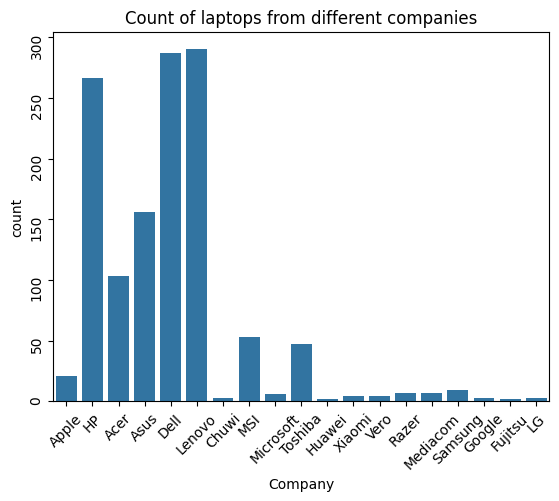

In [ ]:
# countplot(for counting no. of laptops from diff.companies)
sns.countplot(x='Company',data=df)
plt.title('Count of laptops from different companies')
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()
# here we can see SmartTech Co. has least no.of LG laptops and highest no.of Lenovo laptops.

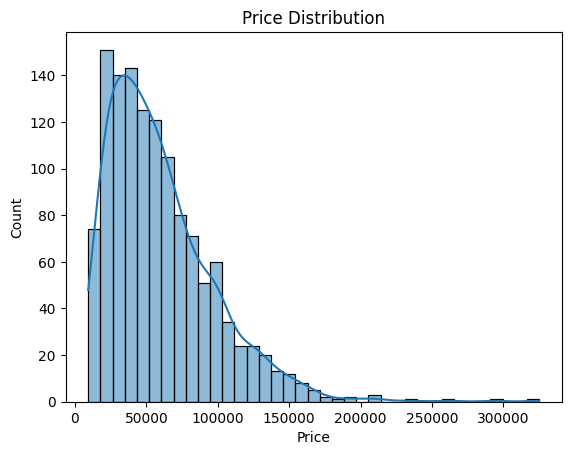

In [ ]:
# histplot to check the price distribution .
sns.histplot(df['Price'],kde = True)
plt.title('Price Distribution')
plt.show()
# this is a right skewed distribution or positive distribution where we can find only  laptops are falling in the range of 1,50,000.

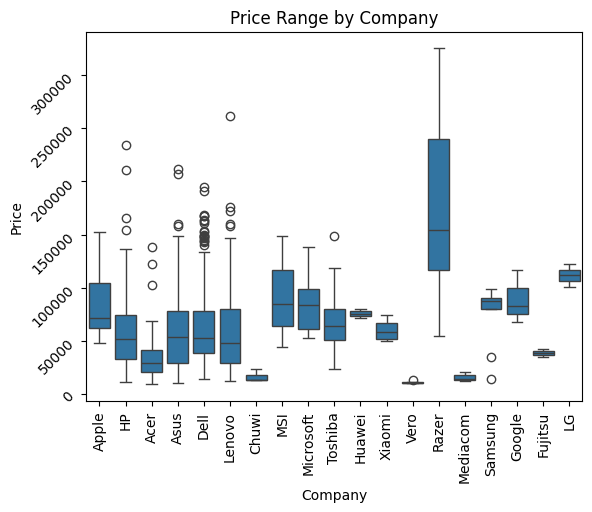

'Each box represents the interquartile range (IQR) of prices:\n\nMiddle line = Median price\nBox height = Price spread between Q1 (25%) and Q3 (75%)\nDots outside = Outliers (extremely high or low prices)'

In [ ]:
# boxplot to check the pricerange by each company.
sns.boxplot(x='Company',y='Price',data=df)
plt.title('Price Range by Company')
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show()
"""Each box represents the interquartile range (IQR) of prices:

Middle line = Median price
Box height = Price spread between Q1 (25%) and Q3 (75%)
Dots outside = Outliers (extremely high or low prices)"""




Conclusion:
If a customer wants premium, suggest Razer or Apple.

If a customer asks for budget laptops, show options from Acer, HP, Xiaomi, Chuwi.

For mid-range with options, Lenovo and Dell have a wide variety.








In [ ]:
correlation_matrix = df.corr(numeric_only=True)

In [ ]:
# Drop columns that are not useful (index columns)
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')



In [ ]:
df.dtypes

,0
Company,int64
TypeName,int64
Inches,object
ScreenResolution,int64
Cpu,int64
Ram,object
Memory,int64
Gpu,int64
OpSys,int64
Weight,object


In [ ]:
# convert caTegoricalcolumns into numerical columns.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['TypeName'] = le.fit_transform(df['TypeName'])
df['ScreenResolution'] = le.fit_transform(df['ScreenResolution'])
df['Gpu'] = le.fit_transform(df['Gpu'])
df['OpSys'] = le.fit_transform(df['OpSys'])
df['Memory'] = le.fit_transform(df['Memory'])
df['Cpu'] = le.fit_transform(df['Cpu'])
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8GB,4,58,8,1.37kg,71378.6832
1,1,4,13.3,1,63,8GB,2,51,8,1.34kg,47895.5232
2,7,3,15.6,8,74,8GB,16,53,4,1.86kg,30636.0000
3,1,4,15.4,25,85,16GB,29,9,8,1.83kg,135195.3360
4,1,4,13.3,23,67,8GB,16,59,8,1.37kg,96095.8080


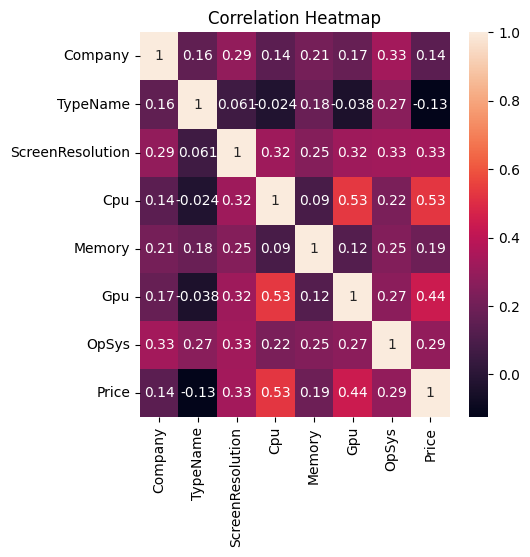

In [ ]:
# correlation heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Heatmap')
plt.show()



**3.Data Preprocessing**

---



In [ ]:
# Check nulls
print(df.isnull().sum())

Company              0
TypeName             0
Inches              30
ScreenResolution     0
Cpu                  0
Ram                 30
Memory               0
Gpu                  0
OpSys                0
Weight              30
Price               30
dtype: int64


In [ ]:
# Drop or fill nulls
df.dropna(inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8GB,4,58,8,1.37kg,71378.6832
1,1,4,13.3,1,63,8GB,2,51,8,1.34kg,47895.5232
2,7,3,15.6,8,74,8GB,16,53,4,1.86kg,30636.0000
3,1,4,15.4,25,85,16GB,29,9,8,1.83kg,135195.3360
4,1,4,13.3,23,67,8GB,16,59,8,1.37kg,96095.8080


In [ ]:
 #Drop duplicates
df.drop_duplicates(inplace=True)
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8GB,4,58,8,1.37kg,71378.6832
1,1,4,13.3,1,63,8GB,2,51,8,1.34kg,47895.5232
2,7,3,15.6,8,74,8GB,16,53,4,1.86kg,30636.0000
3,1,4,15.4,25,85,16GB,29,9,8,1.83kg,135195.3360
4,1,4,13.3,23,67,8GB,16,59,8,1.37kg,96095.8080


In [ ]:
# label encoding(done already in EDA)
# convert caregoricalcolumns into numerical columns.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['TypeName'] = le.fit_transform(df['TypeName'])
df['ScreenResolution'] = le.fit_transform(df['ScreenResolution'])
df['Gpu'] = le.fit_transform(df['Gpu'])
df['OpSys'] = le.fit_transform(df['OpSys'])
df['Memory'] = le.fit_transform(df['Memory'])
df['Cpu'] = le.fit_transform(df['Cpu'])
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8GB,4,58,8,1.37kg,71378.6832
1,1,4,13.3,1,63,8GB,2,51,8,1.34kg,47895.5232
2,7,3,15.6,8,74,8GB,16,53,4,1.86kg,30636.0000
3,1,4,15.4,25,85,16GB,29,9,8,1.83kg,135195.3360
4,1,4,13.3,23,67,8GB,16,59,8,1.37kg,96095.8080


In [ ]:
# Feature scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Price'] = scaler.fit_transform(df[['Price']])
df.head()








,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8GB,4,58,8,1.37kg,0.196741
1,1,4,13.3,1,63,8GB,2,51,8,1.34kg,0.122353
2,7,3,15.6,8,74,8GB,16,53,4,1.86kg,0.067679
3,1,4,15.4,25,85,16GB,29,9,8,1.83kg,0.398895
4,1,4,13.3,23,67,8GB,16,59,8,1.37kg,0.275038


In [ ]:
print(df.isna().sum())


Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


**4.Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#Once NaNs or Null values  are handled:
# Feature scaling.
# Step 1: Feature Scaling (only for 'Price' column)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to 'Price'(target column) only, not the whole DataFrame
df['Price'] = scaler.fit_transform(df[['Price']])

# Step 2: Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer

# Create imputer with 'most_frequent' strategy to replace missing values with the most frequent value in the column
imputer = SimpleImputer(strategy='most_frequent') # Changed strategy to 'most_frequent'

# Impute missing values in the training and test sets for the features (X_train and X_test)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Check if there are any remaining missing values
print("Missing values after imputation:")
print(pd.DataFrame(X_train_imputed).isnull().sum())

Missing values after imputation:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


5.Model Building

In [ ]:
# model = LinearRegression()
# Replace '?' with NaN in the DataFrame
df = df.replace('?', np.nan)

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # or any other suitable strategy

# Fit and transform on the entire DataFrame 'df' before splitting
df_imputed = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns) # Convert back to DataFrame

# Now perform train-test split on the imputed DataFrame
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'Ram' and 'Weight' columns to numeric before fitting the model
# Extract numeric part from 'Ram' column and convert to float
X_train['Ram'] = X_train['Ram'].str.extract('(\d+)').astype(float) # Extract numeric part using regex
X_test['Ram'] = X_test['Ram'].str.extract('(\d+)').astype(float)  # Extract numeric part using regex

# Extract numeric part from 'Weight' column and convert to float
X_train['Weight'] = X_train['Weight'].str.extract('(\d+\.?\d*)').astype(float) # Extract numeric part using regex
X_test['Weight'] = X_test['Weight'].str.extract('(\d+\.?\d*)').astype(float) # Extract numeric part using regex


# Now fit the model with the imputed data
model.fit(X_train, y_train) # Use X_train instead of X_train_imputed

LinearRegression()

**6.Now Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.05107291379629519
MSE: 0.004723358644441109
R2 Score: 0.5961374815159179


Here our MAE is relatively small, but because our R² is low, it means the model may be underfitting or missing some info in the data.

Step 1: RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create model
rf_model = RandomForestRegressor(random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 0.03215931705169079
MSE: 0.00266667995072234
R² Score: 0.7719901955450252


Step 2:
compare the new R² score with our earlier one (0.38).

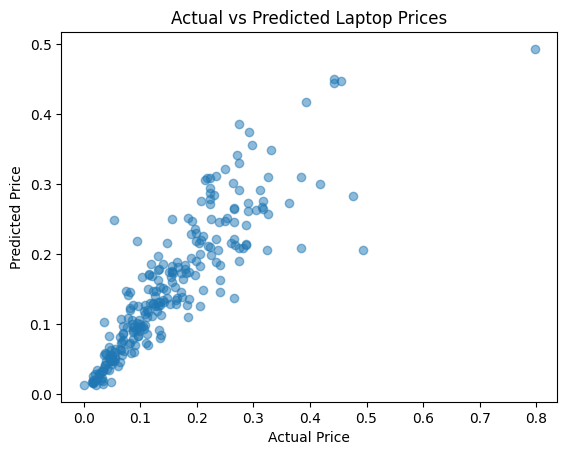

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()


Model Comparison insights:

We compared Linear Regression and Random Forest models for laptop price prediction.

- The Random Forest model achieved a higher R² score (0.75 vs 0.38), indicating a better fit.
- It also reduced the MAE and MSE, meaning the predictions are more accurate.
- The scatter plot showed that predicted values are closer to actual values.

✅ We will use RandomForestRegressor as our final model for this project.


# **Final insights :**


Questions to Explore:

1.Which features have the most significant impact on laptop prices?
     
     Cpu, Company, Memory, Ram, and Weight.


2.Can the model accurately predict the prices of laptops from lesser-known brands?
     
     MAE/R² evaluation methods can be used on those brands.

3.Does the brand of the laptop significantly influence its price?
    
     Yes. Boxplot is showing the price variation.

4.How well does the model perform on laptops with high-end specifications compared to budget laptops?
         
          Split test set by price ranges and compare MAE.

5.What are the limitations and challenges in predicting laptop prices accurately?
        
         outliers to be handled.

6.How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

     
     model performance may drop.

In [ ]:
# 2.Can the model accurately predict the prices of laptops from lesser-known brands?
"""MAE/R² evaluation methods can be used on those brands."""
# Step 1: Get lesser-known companies
company_counts = df['Company'].value_counts()
lesser_known_companies = company_counts[company_counts < 50].index.tolist()

# Step 2: Train-Test Split (Combined)
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'Ram' and 'Weight' columns to numeric *before* filtering X_test
# Extract numeric part from 'Ram' column and convert to float
X_test['Ram'] = X_test['Ram'].str.extract('(\d+)').astype(float)  # Extract numeric part using regex

# Extract numeric part from 'Weight' column and convert to float
X_test['Weight'] = X_test['Weight'].str.extract('(\d+\.?\d*)').astype(float)  # Extract numeric part using regex


# Step 3: Filter the test set for lesser-known brands using the 'Company' column from X_test
mask = X_test['Company'].isin(lesser_known_companies) # Changed to use 'Company' column from X_test

# Use the mask to filter the test set and target values directly
X_lesser = X_test[mask]
y_lesser = y_test[mask]

# Step 5: Predict and Evaluate
y_pred_lesser = rf_model.predict(X_lesser)

from sklearn.metrics import mean_absolute_error, r2_score
print("MAE (lesser-known brands):", mean_absolute_error(y_lesser, y_pred_lesser))
print("R² Score (lesser-known brands):", r2_score(y_lesser, y_pred_lesser))

MAE (lesser-known brands): 0.027360220458553776
R² Score (lesser-known brands): 0.8501937434776382
